In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
FILE = 'diff_in_diff.csv'

sns.set_style("darkgrid")
pd.options.display.max_columns = 100

In [99]:
data = pd.read_csv(FILE)
data.head()

,sales,discount,age,gender,cust_state,tenure,profit,month
0,1153.28,0,25,O,MA,19,57.66,7
1,1978.13,0,26,M,MG,16,98.91,6
2,1095.70,0,26,W,RJ,20,54.78,2
3,2404.90,25,30,W,BA,18,95.24,6
4,1704.80,0,38,M,PB,15,85.24,4


In [100]:
data.describe(include='all')

,sales,discount,age,gender,cust_state,tenure,profit,month
count,50000.000000,50000.000000,50000.000000,45035,50000,50000.000000,50000.000000,50000.000000
unique,NaN,NaN,NaN,3,27,NaN,NaN,NaN
top,NaN,NaN,NaN,W,SP,NaN,NaN,NaN
freq,NaN,NaN,NaN,20702,10972,NaN,NaN,NaN
mean,1908.941962,8.695000,31.500780,NaN,NaN,19.978760,86.752195,6.871460
std,667.250210,12.227018,6.347869,NaN,NaN,4.455629,31.198799,3.897014
min,37.400000,0.000000,16.000000,NaN,NaN,4.000000,-5.330000,0.000000
25%,1463.110000,0.000000,27.000000,NaN,NaN,17.000000,66.397500,4.000000
50%,1959.575000,0.000000,31.000000,NaN,NaN,20.000000,90.430000,6.000000
75%,2345.222500,25.000000,35.000000,NaN,NaN,23.000000,107.022500,8.000000


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sales       50000 non-null  float64
 1   discount    50000 non-null  int64  
 2   age         50000 non-null  int64  
 3   gender      45035 non-null  object 
 4   cust_state  50000 non-null  object 
 5   tenure      50000 non-null  int64  
 6   profit      50000 non-null  float64
 7   month       50000 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 3.1+ MB


In [102]:
data['gender'].unique()

array(['O', 'M', 'W', nan], dtype=object)

In [103]:
# data['gender'].fillna('None', inplace=True)
data.to_parquet('diffs.parq.gzip')

In [104]:
by_month = data.groupby(['month', 'gender'])['discount'].mean().reset_index()
by_month.head()

,month,gender,discount
0,0,M,0.0
1,0,O,0.0
2,0,W,0.0
3,1,M,0.0
4,1,O,0.0


In [106]:
by_month_fillna = data.fillna('None').groupby(['month', 'gender'])['discount'].mean().reset_index()
by_month_fillna.head()

,month,gender,discount
0,0,M,0.0
1,0,None,0.0
2,0,O,0.0
3,0,W,0.0
4,1,M,0.0


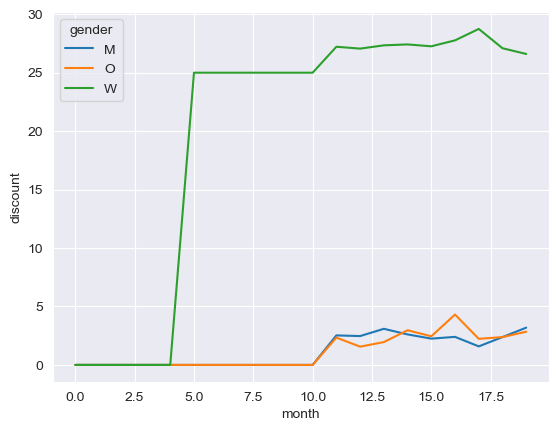

In [105]:
sns.lineplot(x='month', y='discount', hue='gender', data=by_month)
plt.show()

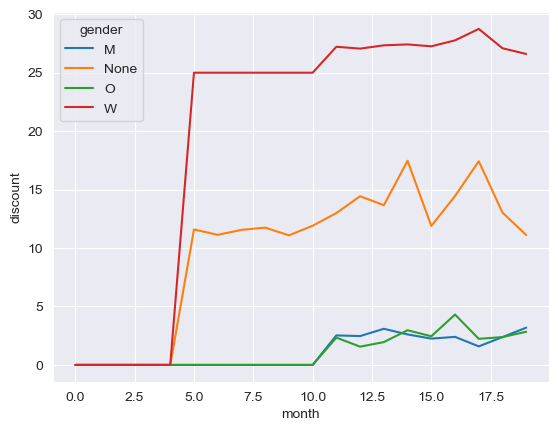

In [107]:
sns.lineplot(x='month', y='discount', hue='gender', data=by_month_fillna)
plt.show()

In [108]:
by_state = data.groupby(['month', 'cust_state'])[['profit', 'discount']].mean().reset_index()
by_state.head()

,month,cust_state,profit,discount
0,0,AC,42.190000,0.0
1,0,AL,55.047647,0.0
2,0,AM,62.797273,0.0
3,0,AP,63.494000,0.0
4,0,BA,67.307551,0.0


In [109]:
max_idx = by_state.loc[:, 'discount'].idxmax()
max_state = by_state.loc[max_idx, :]
max_state

month                 17
cust_state            MG
profit        110.530735
discount       41.176471
Name: 468, dtype: object

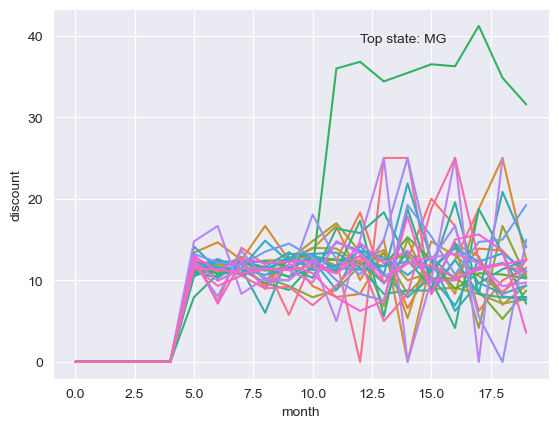

In [110]:
g = sns.lineplot(x='month', y='discount', hue='cust_state', data=by_state, legend=False)
plt.annotate(
    text=f"Top state: {max_state['cust_state']}", xy=(max_state['month'], max_state['discount']),
    xytext=(max_state['month']-5, max_state['discount']-2),
)
plt.show()